In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#read the file from local folder
df_train = pd.read_csv("/Users/yanglulu/Desktop/tdi_rentals_dataset.csv")

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   obs                731 non-null    int64  
 1   date               731 non-null    object 
 2   year               731 non-null    int64  
 3   month              731 non-null    int64  
 4   season             731 non-null    int64  
 5   holiday            731 non-null    int64  
 6   working_day        731 non-null    int64  
 7   weather_condition  731 non-null    int64  
 8   temp               731 non-null    float64
 9   feel_temp          731 non-null    float64
 10  humidity           731 non-null    float64
 11  wind_speed         731 non-null    float64
 12  occasional         731 non-null    int64  
 13  members            731 non-null    int64  
 14  rental             731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [4]:
df_train.describe()

,obs,year,month,season,holiday,working_day,weather_condition,temp,feel_temp,humidity,wind_speed,occasional,members,rental
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,6.519836,2.496580,0.028728,0.683995,1.395349,20.310776,23.717699,0.627894,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,1.110807,0.167155,0.465233,0.544894,7.505091,8.148059,0.142429,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,4.000000,2.000000,0.000000,0.000000,1.000000,13.820424,16.892125,0.520000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,7.000000,3.000000,0.000000,1.000000,1.000000,20.431653,24.336650,0.626667,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,10.000000,3.000000,0.000000,1.000000,2.000000,26.872076,30.430100,0.730209,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,12.000000,4.000000,1.000000,1.000000,3.000000,35.328347,42.044800,0.972500,34.000021,3410.000000,6946.000000,8714.000000


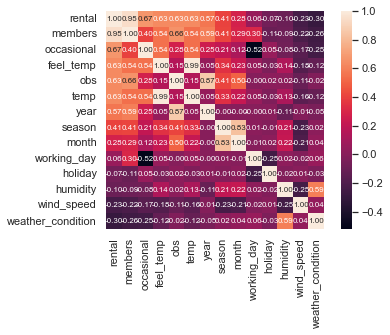

In [6]:
k=14
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'rental')['rental'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':8},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

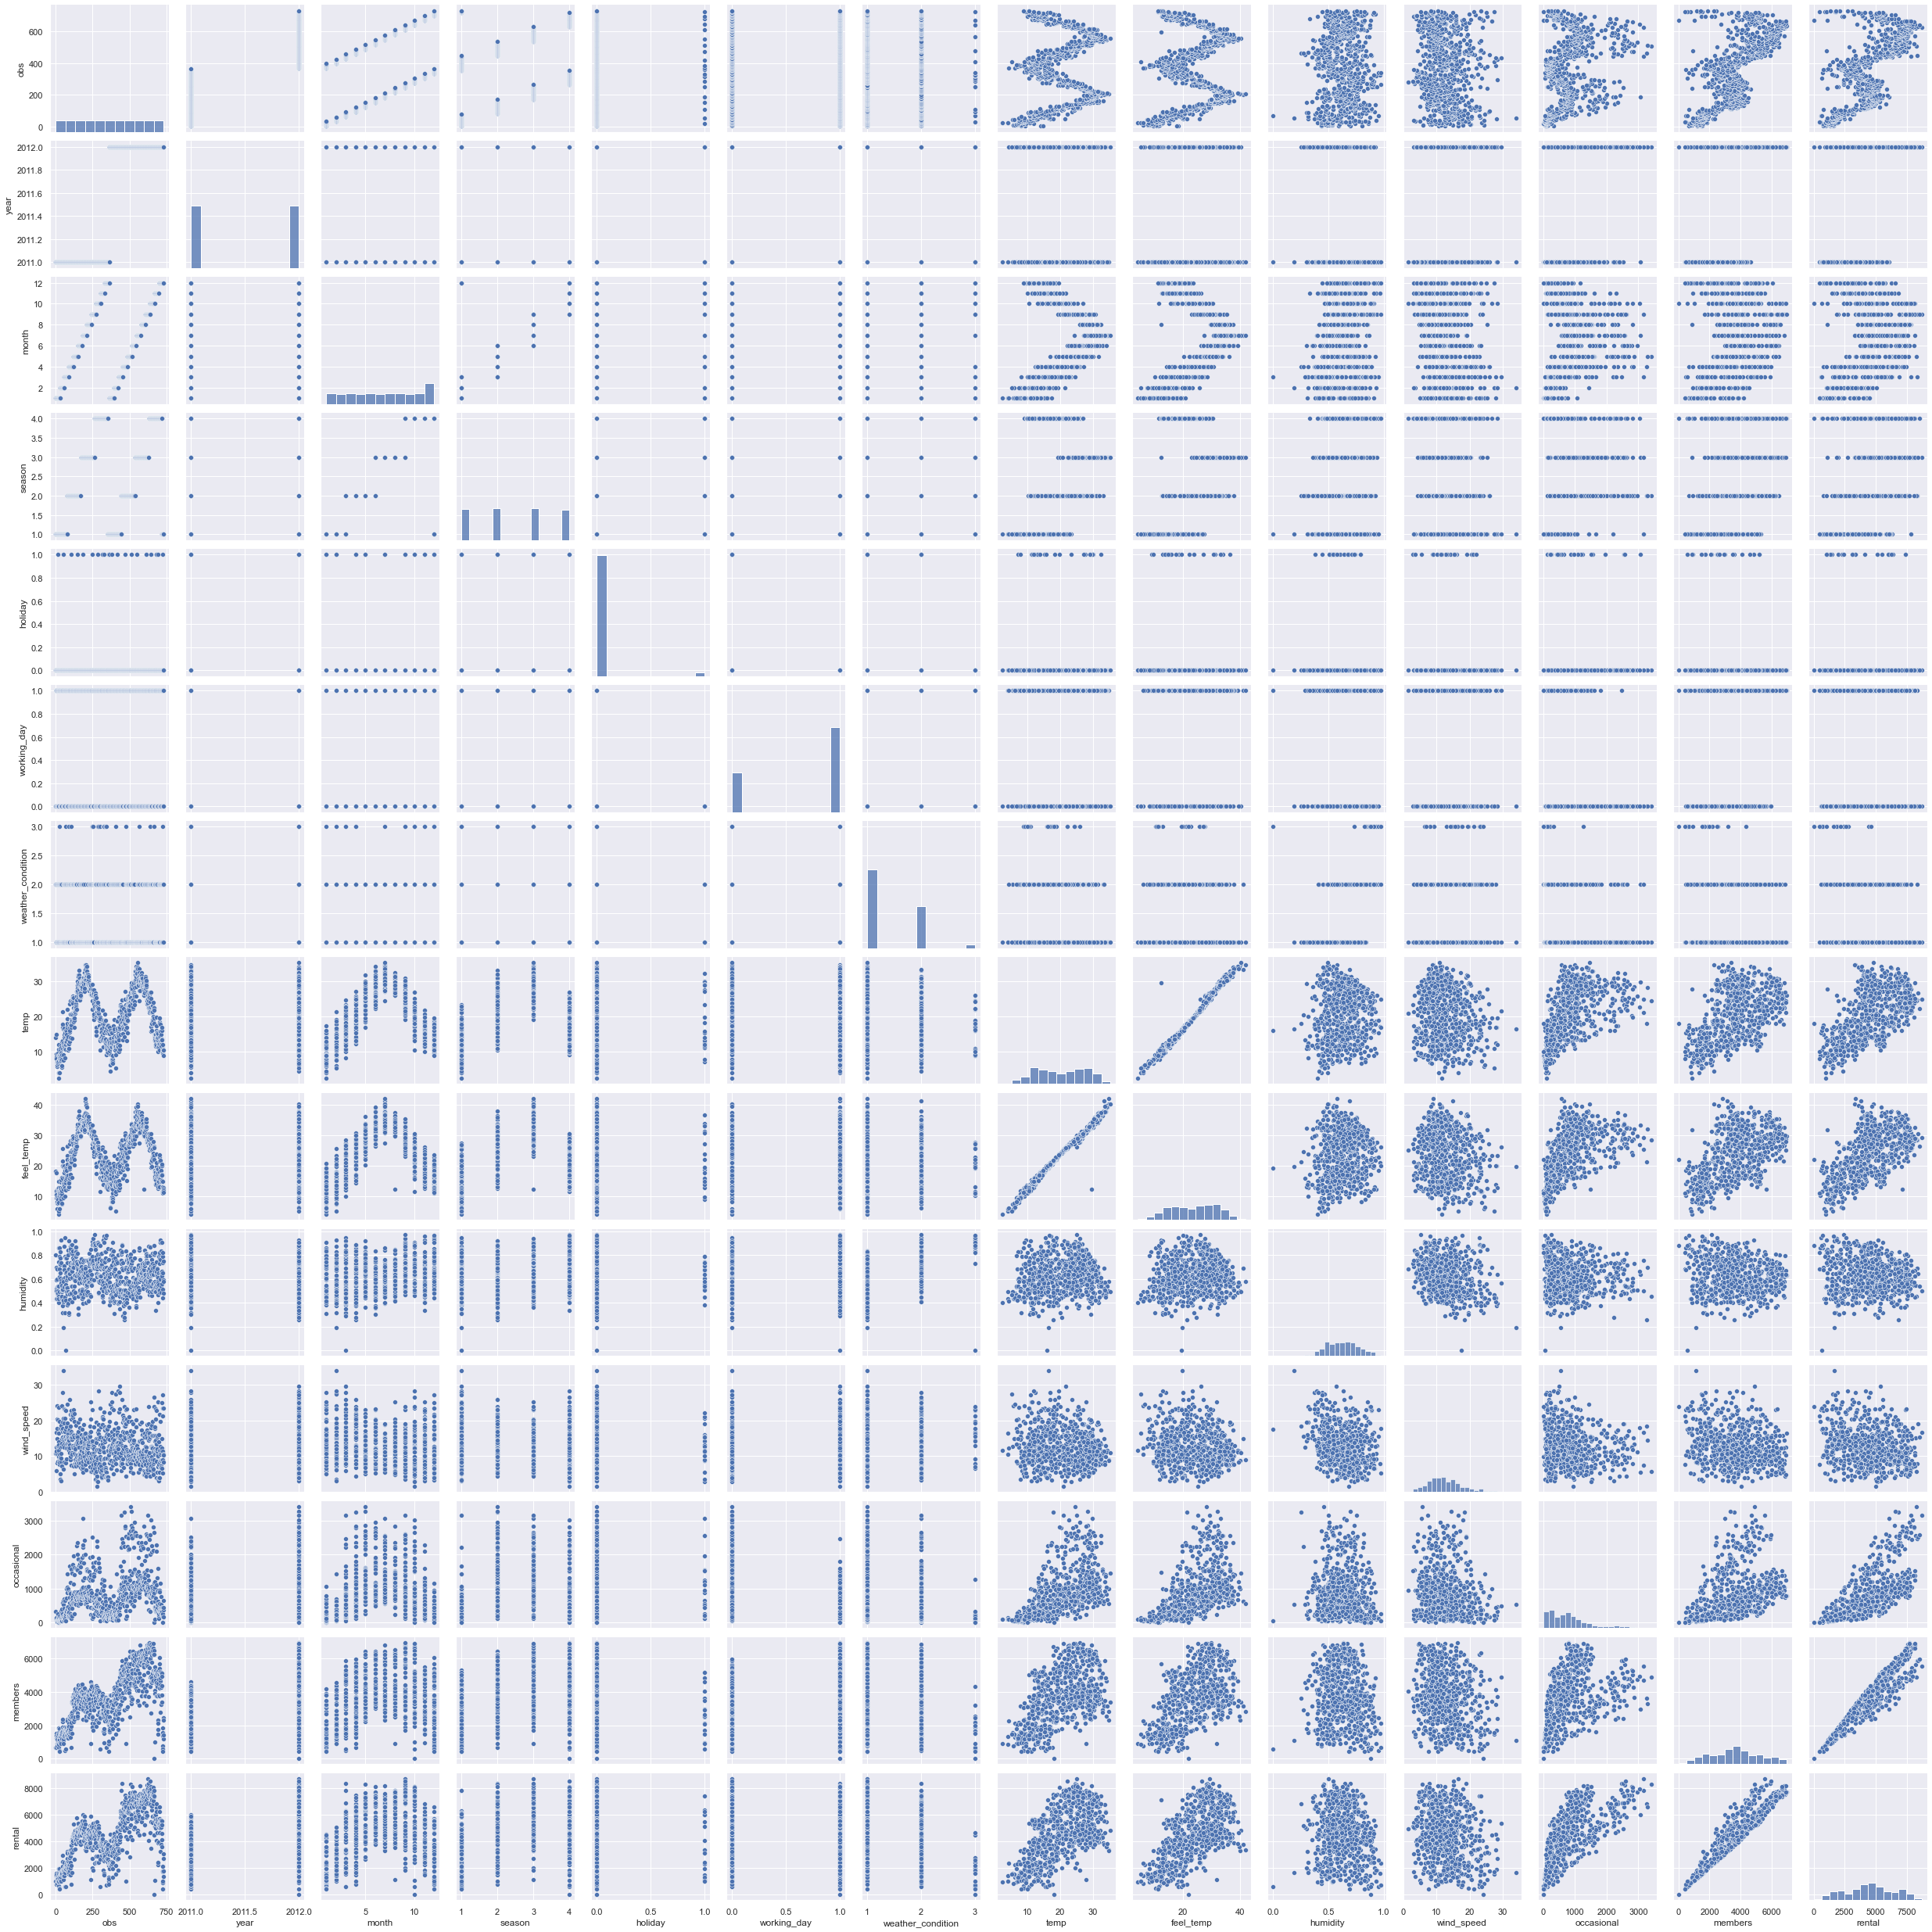

In [7]:
sns.set()
cols = df_train.columns
sns.pairplot(df_train[cols],size=2.5)
plt.show()

In [10]:
X=df_train.drop(['rental','members','occasional','date'],axis=1).values
y=df_train['rental']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr=LinearRegression().fit(X_train,y_train)
print('train_score:{:.2f}'.format(lr.score(X_train,y_train)))
print('test_score:{:.2f}'.format(lr.score(X_test,y_test)))
rf=RandomForestRegressor().fit(X_train,y_train)
print('train_score:{:.2f}'.format(rf.score(X_train,y_train)))
print('test_score:{:.2f}'.format(rf.score(X_test,y_test)))

train_score:0.78
test_score:0.82
train_score:0.98
test_score:0.89


In [12]:
models = []
models.append(("RF",RandomForestRegressor()))
models.append(("SVR",SVR()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsRegressor()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=10)
   print(name, cv_result.mean())

RF 0.0541869208915164
SVR -6.432693654206505
Dtree -0.4843979737794104
KNN -0.8607860446219078


In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_pp = scaler.transform(X_train)
X_test_pp = scaler.transform(X_test)
rf=RandomForestRegressor().fit(X_train_pp,y_train)
print('train_score:{:.2f}'.format(rf.score(X_train_pp,y_train)))
print('test_score:{:.2f}'.format(rf.score(X_test_pp,y_test)))

train_score:0.98
test_score:0.88


<AxesSubplot:xlabel='temp', ylabel='Density'>

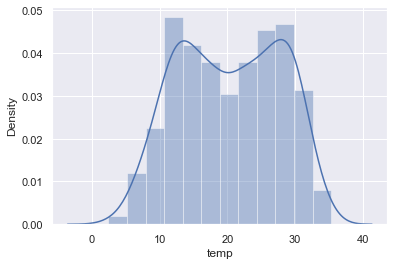

In [14]:
sns.distplot(df_train['temp'])

<AxesSubplot:xlabel='log_temp', ylabel='Density'>

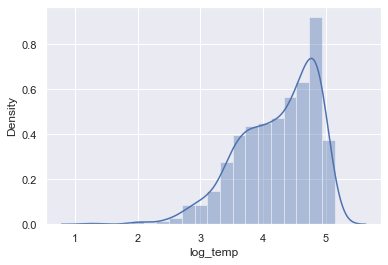

In [15]:
df_train['log_temp'] = np.log2(df_train['temp'])
sns.distplot(df_train['log_temp'])

In [16]:
dummies = pd.get_dummies(df_train.season)
merged = pd.concat([df_train,dummies],axis='columns')
merged=merged.rename(columns={1: "spring", 2: "summer", 3: "fall", 4:"winter"})
dummies = pd.get_dummies(df_train['working_day'])
merged = pd.concat([merged,dummies],axis='columns')
merged=merged.rename(columns={0: "weekend_holiday", 1: "workingday"})
dummies = pd.get_dummies(df_train['weather_condition'])
merged = pd.concat([merged,dummies],axis='columns')
merged=merged.rename(columns={1: "clear", 2: "cloudy", 3:"light_rain_snow"})
dummies = pd.get_dummies(df_train['month'])
merged = pd.concat([merged,dummies],axis='columns')
merged=merged.rename(columns={1: "Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
dummies = pd.get_dummies(df_train['year'])
merged = pd.concat([merged,dummies],axis='columns')
merged=merged.rename(columns={2011: "2011", 2012: "2012"})

In [20]:
X=merged.drop(['rental','members','occasional','date','obs','temp','season','winter','working_day','weekend_holiday','weather_condition','light_rain_snow','month','Dec','year','2012'],axis=1).values
y=merged['rental']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr=LinearRegression().fit(X_train,y_train)
print('train_score:{:.2f}'.format(lr.score(X_train,y_train)))
print('test_score:{:.2f}'.format(lr.score(X_test,y_test)))
rf=RandomForestRegressor().fit(X_train,y_train)
print('train_score:{:.2f}'.format(rf.score(X_train,y_train)))
print('test_score:{:.2f}'.format(rf.score(X_test,y_test)))

train_score:0.84
test_score:0.85
train_score:0.98
test_score:0.89


In [23]:
models = []
models.append(("RF",RandomForestRegressor()))
models.append(("SVR",SVR()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsRegressor()))

for name,model in models:
   cv_result = cross_val_score(model,X,y,cv=10)
   print(name, cv_result.mean())

RF -0.0699711572304115
SVR -6.2230806252227975
Dtree -0.7925898805337817
KNN -2.8207828633004626


In [24]:
#PCA
#scaler=StandardScaler()
#X_scaled=scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(X)
X_pca=pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=42)
lr=LinearRegression().fit(X_train,y_train)
print('train_score:{:.2f}'.format(lr.score(X_train,y_train)))
print('test_score:{:.2f}'.format(lr.score(X_test,y_test)))
rf=RandomForestRegressor().fit(X_train,y_train)
print('train_score:{:.2f}'.format(rf.score(X_train,y_train)))
print('test_score:{:.2f}'.format(rf.score(X_test,y_test)))

train_score:0.72
test_score:0.75
train_score:0.98
test_score:0.81


In [25]:
models = []
models.append(("RF",RandomForestRegressor()))
models.append(("SVR",SVR()))
models.append(("Dtree",DecisionTreeRegressor()))
#models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsRegressor()))

for name,model in models:
   cv_result = cross_val_score(model,X_pca,y,cv=10)
   print(name, cv_result.mean())

RF -0.08114516967158422
SVR -6.079526717014142
Dtree -0.7881153887892998
KNN -2.653203286863608


In [26]:
X_pca

array([[ 5.13588846, -3.01888453,  0.73504715, -0.4940488 , -0.40133041],
       [ 6.70482067,  2.69169843,  0.74522423, -0.55124249, -0.39605021],
       [14.79162002,  1.16084813, -0.65273647, -0.30956472, -0.46252154],
       ...,
       [10.63448099, -6.51070888,  0.6690158 , -0.33393908,  0.56438777],
       [13.94873883,  8.30462767, -0.67685997, -0.25012757,  0.52641611],
       [11.95105626, -4.68247554,  0.72363809, -0.3683451 ,  0.55957435]])